In [78]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
plt.rcParams["figure.figsize"] = (15,10)

# Problem 0

In [58]:
t = np.linspace(0,np.pi*100,np.int(1e5))
t

array([0.00000000e+00, 3.14162407e-03, 6.28324814e-03, ...,
       3.14152982e+02, 3.14156124e+02, 3.14159265e+02])

In [59]:
N = 10+np.sin(t)
N

array([10.        , 10.00314162, 10.00628321, ...,  9.99371679,
        9.99685838, 10.        ])

In [60]:
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N
bkgd

array([12.59389349,  6.09345956, 11.56483778, ...,  9.24385421,
        5.49739413,  7.25418458])

We make an attempt to plot bkgd against t.

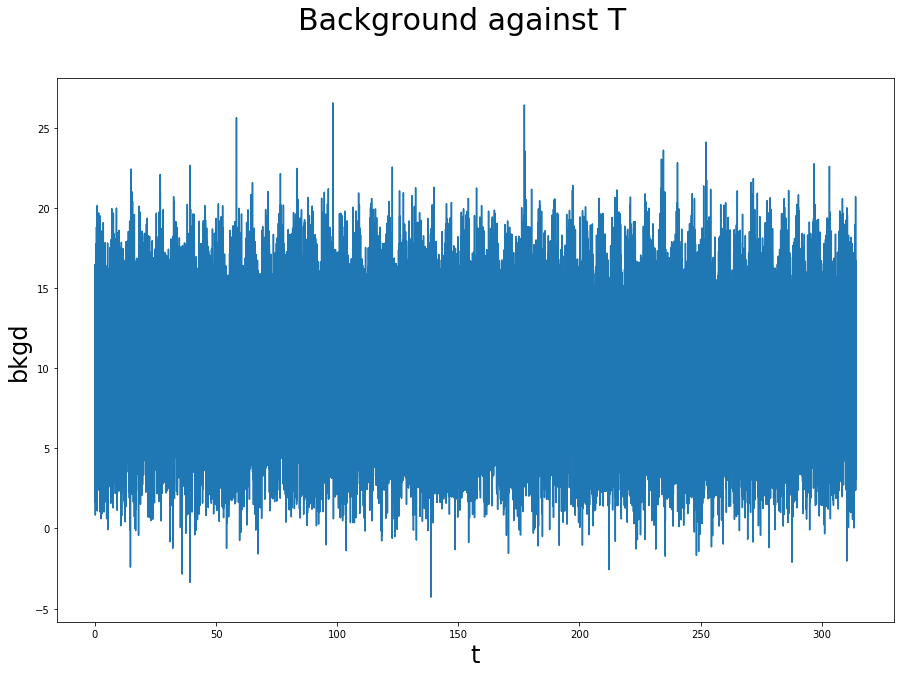

In [61]:
plt.suptitle('Background against T', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.plot(t, bkgd)

# Problem 1

## 1a)

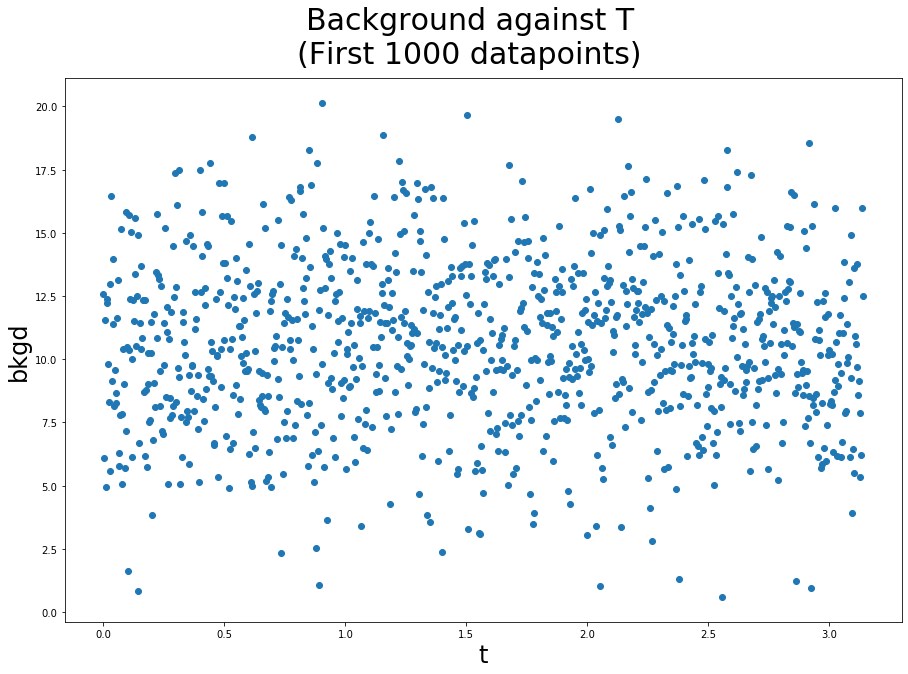

In [62]:
plt.suptitle('Background against T\n(First 1000 datapoints)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.scatter(t[0:1000], bkgd[0:1000])

## 1b)

I shall generalize my code into a function that allows for plotting **x** contiguous points starting at **start**.

In [63]:
def plt_bkgd_contig(x, start):
    plt.suptitle('Background against T\n(' + str(x) + ' datapoints starting at ' + str(start) + ')', fontsize=30)
    plt.xlabel('t', fontsize = 24)
    plt.ylabel('bkgd', fontsize = 24)
    plt.scatter(t[start:start+x], bkgd[start:start+x])

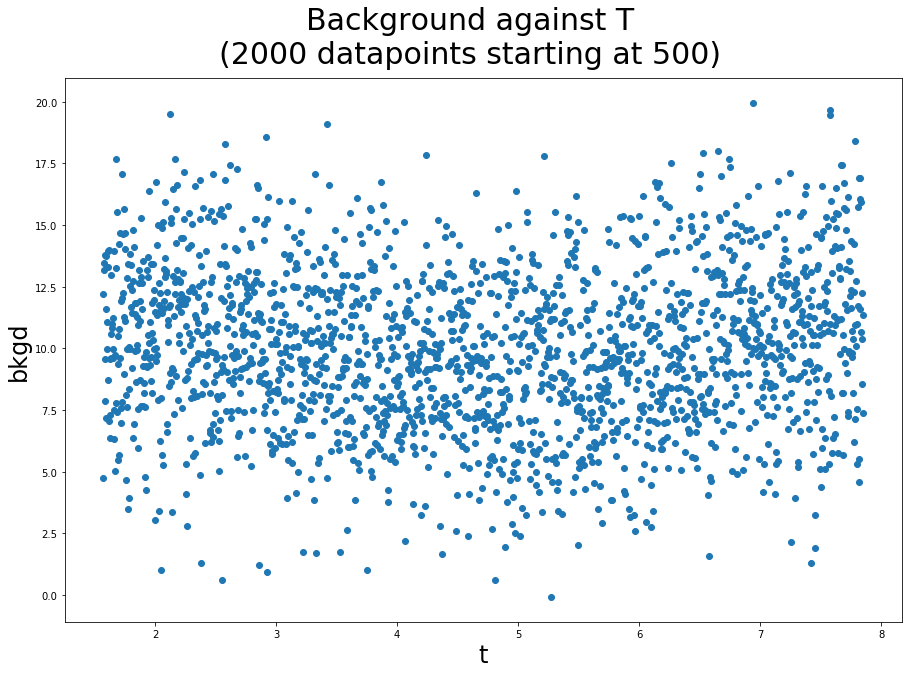

In [64]:
# 2000 points starting at 500
plt_bkgd_contig(2000, 500)

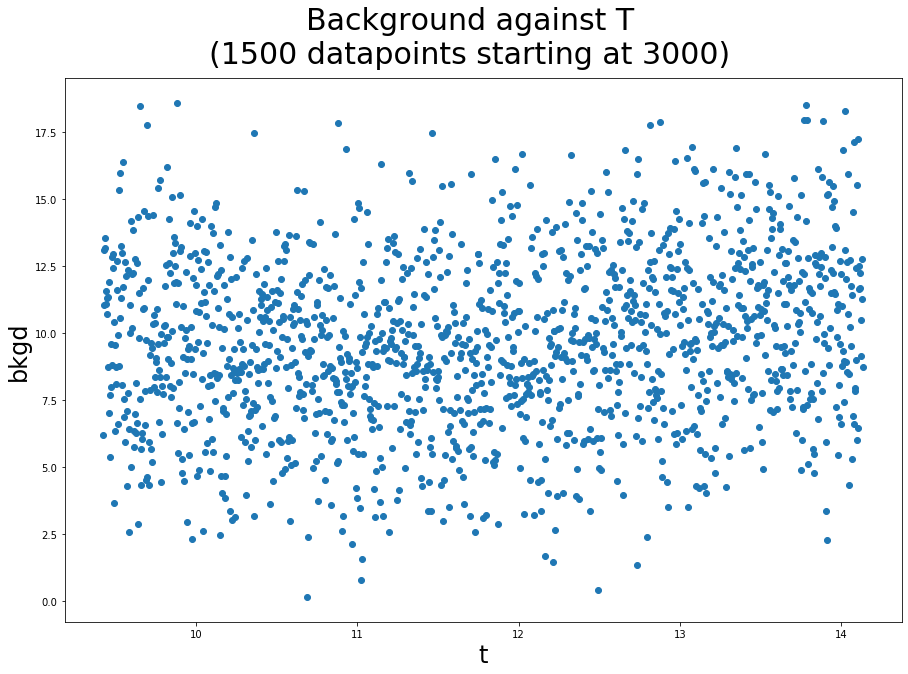

In [65]:
plt_bkgd_contig(1500, 3000)

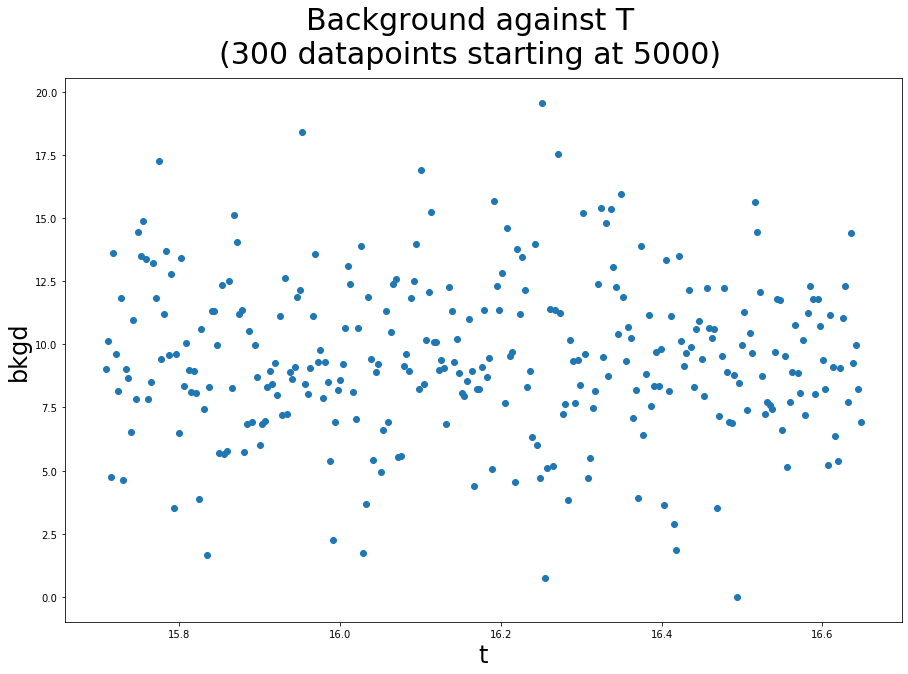

In [66]:
plt_bkgd_contig(300, 5000)

## 1c)

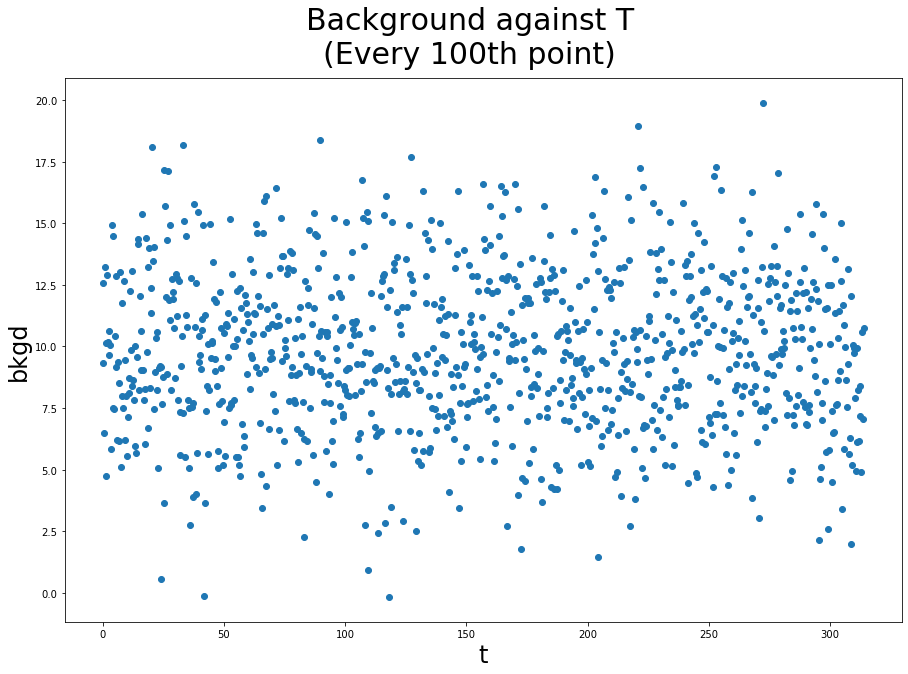

In [67]:
plt.suptitle('Background against T\n(Every 100th point)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.scatter(t[0::100], bkgd[0::100])

# Problem 2

## 2a)

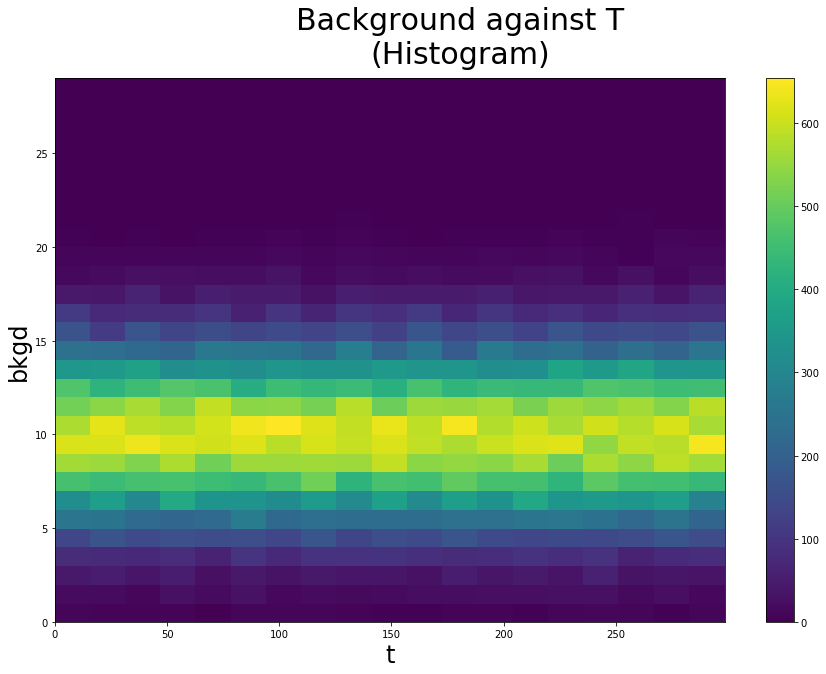

In [79]:
plt.suptitle('Background against T\n(Histogram)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
binx = np.arange(0,100 * math.pi, 5 * math.pi)
biny = np.arange(0,30)
plt.hist2d(t, bkgd, bins = [binx, biny], density = False)
plt.colorbar()

## 2b)
We are plotting the number of datapoints in a certain bin.
<br>For instance, in the rightmost yellow bin, we have over 600 datapoints that fall between the range for $95\pi <= t <= 100\pi$ and $9 <= bkgt <= 10$

## 3

## 3a)

In [88]:
t_2pi = t % (2 * math.pi)
t_2pi

array([0.00000000e+00, 3.14162407e-03, 6.28324814e-03, ...,
       6.27690206e+00, 6.28004368e+00, 1.42108547e-14])

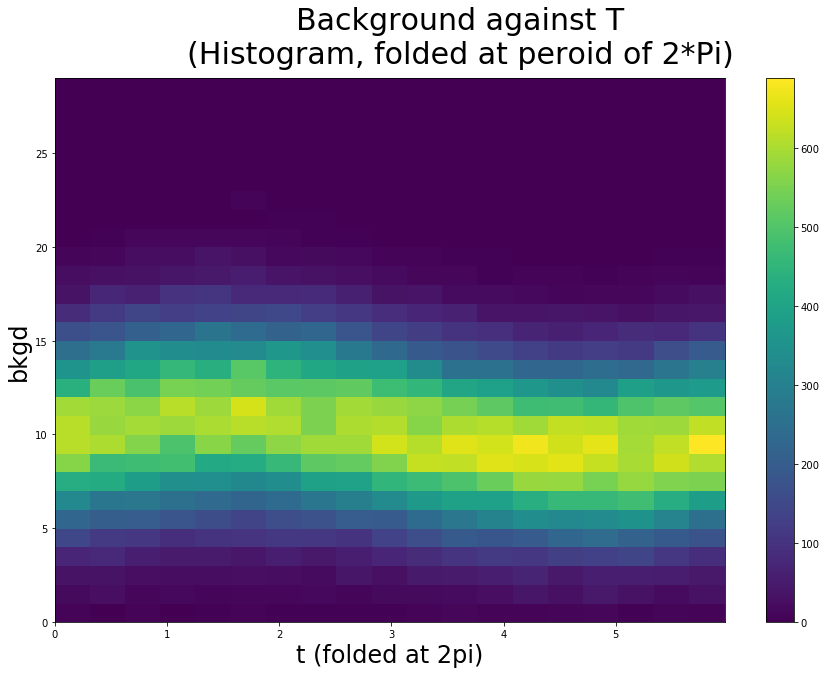

In [89]:
plt.suptitle('Background against T\n(Histogram, folded at peroid of 2*Pi)', fontsize=30)
plt.xlabel('t (folded at 2pi)', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
binx = np.arange(0,2 * math.pi, 0.1 * math.pi)
biny = np.arange(0,30)
plt.hist2d(t_2pi, bkgd, bins = [binx, biny], density = False)
plt.colorbar()

## 3c)
(Unfinished)

In [93]:
dig_bkgd = np.digitize(bkgd, biny)
dig_bkgd

array([13,  7, 12, ..., 10,  6,  8])

(array([  70.,    0.,    0.,  140.,    0.,    0.,  418.,    0.,    0.,
         797.,    0.,    0., 1665.,    0.,    0., 3064.,    0.,    0.,
           0.]),
 array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
        4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604]),
 <a list of 19 Patch objects>)

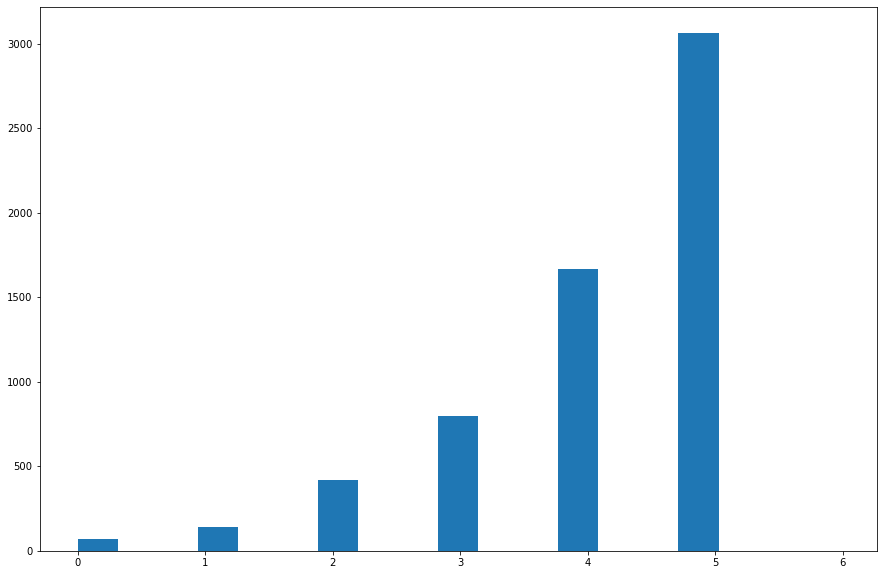

In [91]:
plt.hist(dig_bkgd, binx)